# Importing Libraries

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp

# Importing MediaPipe Libraries

In [26]:
mp_holistic = mp.solutions.holistic         #Holistic model
mp_drawing = mp.solutions.drawing_utils     #Drawing utilities

mp_face_mesh = mp.solutions.face_mesh
mp_hands = mp.solutions.hands
mp_pose = mp.solutions.pose

# Performing Detection

Detecting the Image

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # Color conversion from BGR to RGB
    image.flags.writeable = False                    # Image is no longer writeable
    results = model.process(image)                    # Making predictions
    image.flags.writeable = True                     # Image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   # Color conversion from BGR to RGB
    return image, results

Drawing the connections

In [65]:
def draw_landmarks(image, results):
    #Draw Face, Pose, Left Hand and Right Hand connections respectively
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(50,110,80), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(180,256,200), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(150,150,170), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(100,150,256), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(30,150,220), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,140,140), thickness=2, circle_radius=2)
                             )

In [89]:
#Capturing and Displaying the video feed with detections and connections
cap = cv2.VideoCapture(0)

#Set MediaPipe Model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()                                     #Read feed
        image, results = mediapipe_detection(frame, holistic)       #Make detections
        print(results)

        draw_landmarks(image, results)                              #Draw the Landmarks
        
        cv2.imshow('OpenCV Feed', cv2.flip(image,1))                            #Display feed after modification
        if cv2.waitKey(10) & 0xFF == 27:
            break                                           #Stops when ESC is pressed
    #Clean-Up
    cap.release()
    cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [30]:
# Printing the right_hand_landmarks
len(results.right_hand_landmarks.landmark)

21

In [33]:
results

mediapipe.python.solution_base.SolutionOutputs

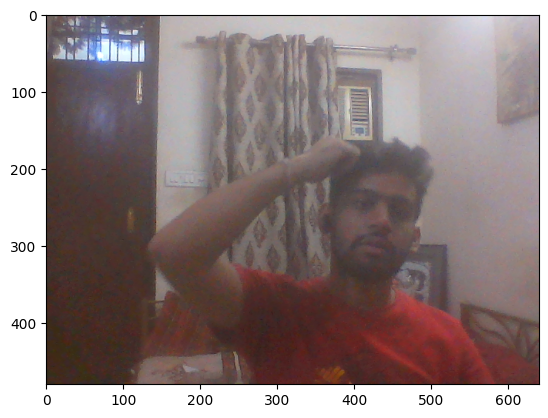

In [66]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [43]:
# Makes changes on the sent frame only
draw_landmarks(frame, results)

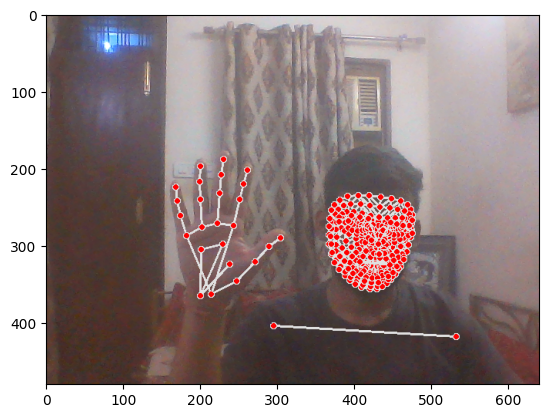

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [76]:
results.pose_landmarks

landmark {
  x: 0.691799939
  y: 0.577599943
  z: -0.771097779
  visibility: 0.999712348
}
landmark {
  x: 0.708376765
  y: 0.538485885
  z: -0.678368
  visibility: 0.999653876
}
landmark {
  x: 0.719678402
  y: 0.542187393
  z: -0.67818
  visibility: 0.999479175
}
landmark {
  x: 0.729410648
  y: 0.545858085
  z: -0.678361118
  visibility: 0.999634683
}
landmark {
  x: 0.673823953
  y: 0.527605355
  z: -0.700377405
  visibility: 0.999571741
}
landmark {
  x: 0.658570945
  y: 0.524509
  z: -0.700183
  visibility: 0.999447107
}
landmark {
  x: 0.642594635
  y: 0.522032082
  z: -0.700393558
  visibility: 0.999622524
}
landmark {
  x: 0.729871392
  y: 0.572276711
  z: -0.242517561
  visibility: 0.999687254
}
landmark {
  x: 0.603861
  y: 0.54809761
  z: -0.320744574
  visibility: 0.999802828
}
landmark {
  x: 0.701213
  y: 0.630052388
  z: -0.622919142
  visibility: 0.99984628
}
landmark {
  x: 0.662611723
  y: 0.620728254
  z: -0.648233771
  visibility: 0.999851465
}
landmark {
  x: 0.80

In [69]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [96]:
# Store the values of pose, left and right hand in 1D numpy array, and store zeros if that landmarks is 'NONE'
def extract_keypoints(results):
    # 33 Pose landmarks with 4 values each
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    # 468 Face landmarks with 3 values each
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    # 21 Left Hand Landmarks with 3 values each
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # 21 Right Hand Landmarks with 3 values each
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    #Concatinating all arrays into one array
    return np.concatenate([pose, face, lh, rh])

In [94]:
extract_keypoints(results).shape

(1662,)

# Setup Folders for Collection

In [166]:
# Path for exported data, numpy arrays
os.makedirs('MP_Data')
Data_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

#Thirty videos worth of Data
no_sequences = 30

#Videos contains 30 frames each
sequence_length = 30

In [167]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            # Going to create a folder for each action where each contains 30 folders of sequences in which each contains 30 frames of Data
            # Therefore, 3 actions * 30 sequence * 30 frames * 1662 landmarks
            os.makedirs(os.path.join(Data_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [169]:
#Capturing and Displaying the video feed with detections and connections
cap = cv2.VideoCapture(0)

#Set MediaPipe Model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    # Iterate for each action
    for action in actions:
        # Iterate through sequences aka videos
        for sequence in range(no_sequences):
            # Iterate through video length aka sequence length
            for frame_num in range(sequence_length):
                ret, frame = cap.read()                                     #Read feed
                frame = cv2.flip(frame, 1)
                image, results = mediapipe_detection(frame, holistic)       #Make detections
                
        
                draw_landmarks(image, results)                              #Draw the Landmarks
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                #Export Keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(Data_PATH, action, str(sequence), str(frame_num))
                #Save the numpy array in the file
                np.save(npy_path, keypoints)
                                
                # Break gracefully
                if cv2.waitKey(10) & 0xFF == 27:
                    break                                           #Stops when ESC is pressed
    #Clean-Up
    cap.release()
    cv2.destroyAllWindows()

E:\Python\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


# Preprocess Data and Create Labels and Featuers

In [170]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [171]:
label_map = {label:num for num,label in enumerate(actions)}

In [172]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [173]:
sequences, labels = [],[]
# Adding the recorded data into a single list
# Total 90 videos, each video contains 30 frames, each frame contains 1662 landmarks
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(Data_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [174]:
# Contains numPy array data
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [175]:
# Converts label to one-hot-encoder manner
Y = to_categorical(labels).astype(int)

In [176]:
# Contains labels for respective array
Y.shape

(90, 3)

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05)

In [178]:
X_train.shape, Y_train.shape

((85, 30, 1662), (85, 3))

In [179]:
X_test.shape, Y_test.shape

((5, 30, 1662), (5, 3))

# Build and Train LSTM Neural Network

In [180]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [181]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [182]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation ='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation ='relu'))
model.add(LSTM(64, return_sequences=False, activation ='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

In [183]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['categorical_accuracy'])

In [185]:
model.fit(X_train, Y_train, epochs=1600, callbacks=[tb_callback])

Epoch 1/1600
3/3 [==============================] - 1s 139ms/step - loss: 0.9376 - categorical_accuracy: 0.5647
Epoch 2/1600
3/3 [==============================] - 0s 145ms/step - loss: 0.9515 - categorical_accuracy: 0.6235
Epoch 3/1600
3/3 [==============================] - 0s 145ms/step - loss: 0.6911 - categorical_accuracy: 0.6588
Epoch 4/1600
3/3 [==============================] - 0s 138ms/step - loss: 0.4873 - categorical_accuracy: 0.7647
Epoch 5/1600
3/3 [==============================] - 0s 143ms/step - loss: 0.4217 - categorical_accuracy: 0.8588
Epoch 6/1600
3/3 [==============================] - 0s 157ms/step - loss: 0.4196 - categorical_accuracy: 0.8353
Epoch 7/1600
3/3 [==============================] - 0s 149ms/step - loss: 0.3990 - categorical_accuracy: 0.7765
Epoch 8/1600
3/3 [==============================] - 0s 161ms/step - loss: 0.3781 - categorical_accuracy: 0.8353
Epoch 9/1600
3/3 [==============================] - 0s 151ms/step - loss: 0.3987 - categorical_accuracy:

KeyboardInterrupt: 

In [186]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 59667

# Make Predictions

In [187]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [188]:
res.shape

(5, 3)

In [193]:
actions[np.argmax(np.argmax(res[1]))]

'hello'

In [213]:
actions[np.argmax(np.argmax(Y_test[1]))]

'hello'

# Save Weights

In [195]:
model.save("detection.h5")

E:\Python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [198]:
import pickle
with open('model_detection.pkl', 'wb') as f:
    pickle.dump(model, f)

# Evaluation using Confusion Matrix and Accuracy

In [199]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [207]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 213ms/step


In [208]:
ytrue = np.argmax(Y_test,axis=1).tolist()
yhat = np.argmax(yhat,axis=1).tolist()

In [209]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [1, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 1],
        [0, 1]]], dtype=int64)

In [210]:
accuracy_score(ytrue,yhat)

0.8

In [211]:
ytrue

[0, 0, 0, 2, 1]

In [212]:
yhat

[0, 2, 0, 2, 1]

# Test in Real Life

In [225]:
colors = [(245,117,16),(117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    return output_frame

In [226]:
#Capturing and Displaying the video feed with detections and connections
sequence = []
sentence = []
threshold = 0.7

cap = cv2.VideoCapture(0)

#Set MediaPipe Model
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()                                     #Read feed
        image, results = mediapipe_detection(frame, holistic)       #Make detections
        print(results)

        draw_landmarks(image, results)                              #Draw the Landmarks
        
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        if res[np.argmax(res)] > threshold:
            if len(sentence) > 0:
                if actions[np.argmax(res)] != sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        image = prob_viz(res,actions,image,colors)
        
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)                            #Display feed after modification
        if cv2.waitKey(10) & 0xFF == 27:
            break                                           #Stops when ESC is pressed
    #Clean-Up
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti